# Long COVID coding in primary care.

This OpenSAFELY report is a routine update of our peer-review paper published in the _British Journal of General Practice_ on the [Clinical coding of long COVID in English primary care: a federated analysis of 58 million patient records in situ using OpenSAFELY](https://doi.org/10.3399/BJGP.2021.0301). 

It is a routine update of the analysis described in the paper. The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussionis and the full analytical methods on this routine report are [available on GitHub](https://github.com/opensafely/long-covid).

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. You can read more about [OpenSAFELY on our website](https://github.com/opensafely/long-covid).

In [1]:
from datetime import datetime
from IPython.display import display, Markdown
import pandas as pd
pd.set_option("display.max_rows", 200)
pd.options.display.float_format = "{:,.1f}".format
float_formatter = "{:,.0f}".format
import lib

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
tpp = lib.tpp_emis_table_format("output", {"0": "Missing"})
total_tpp = tpp.loc["sex",["No long COVID", "Long COVID"]].sum()
all_total_tpp = total_tpp.sum()
emis = lib.tpp_emis_table_format("emis", {"RGN11NM": "region","0": "Missing","6": "Missing"})
total_emis = emis.loc["sex",["No long COVID", "Long COVID"]].sum()
all_total_emis = total_emis.sum()
totals = tpp[["No long COVID", "Long COVID"]] + emis[["No long COVID", "Long COVID"]]

#display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

## Results

### Counts and rates of long COVID coding stratified by demographic variable
This is equivalent to Table 2 from [the paper](https://doi.org/10.3399/BJGP.2021.0301)

In [4]:
total, table_2 = lib.get_table_2([tpp, emis, totals])
display(Markdown(f"There were {float_formatter(total[('Totals','Long COVID')])} people who have been given a diagnostic code for long COVID to date. Counts for each software system are:"))
print(total.loc[(slice(None), "Long COVID")])
display(Markdown(f"The overall rate of long COVID coding in the population was {round(total[('Totals','Rate per 100,000')]/2,1)} per 100,000 people. Rates for each software system are:"))
print(total.loc[(slice(None), "Rate per 100,000")]/2)
table_2

There were 123,579 people who have been given a diagnostic code for long COVID to date. Counts for each software system are:

TPP       30,253.0
EMIS      93,326.0
Totals   123,579.0
dtype: float64


The overall rate of long COVID coding in the population was 217.2 per 100,000 people. Rates for each software system are:

TPP      124.7
EMIS     286.1
Totals   217.2
dtype: float64


TPP                        \
                                   Long COVID Rate per 100,000    %   
age_group 0-17                           2100             43.1  6.9   
          18-24                          1914             99.8  6.3   
          25-34                          4239            125.9 14.0   
          35-44                          6212            191.2 20.5   
          45-54                          7364            225.5 24.3   
          55-69                          6835            160.7 22.6   
          70-79                          1209             57.4  4.0   
          80+                             380             30.9  1.3   
sex       F                             18879            155.6 62.4   
          M                             11374             93.8 37.6   
region    East of England                5170             91.0 17.1   
          East Midlands                  4312            102.7 14.3   
          London                         1335             78.4  4.4   
          North East                     3301            285.1 10.9   
          North West                     3607            172.8 11.9   
          South East                     2573            158.5  8.5   
          South West                     4517            136.2 14.9   
          West Midlands                   917             91.6  3.0   
          Yorkshire and The Humber       4516            129.6 14.9   
imd       Missing                         696            117.7  2.3   
          Most deprived 1                5452            112.1 18.0   
          2                              5854            123.1 19.4   
          3                              6259            124.9 20.7   
          4                              6505            138.2 21.5   
          Least deprived 5               5487            126.7 18.1   
ethnicity Missing                        7033            105.3 23.2   
          White                         20154            136.5 66.6   
          Mixed                           334            104.0  1.1   
          South Asian                    1921            127.9  6.3   
          Black                           475             91.9  1.6   
          Other                           336             70.4  1.1   

                                         EMIS                        \
                                   Long COVID Rate per 100,000    %   
age_group 0-17                           7536            113.7  8.1   
          18-24                          6244            234.2  6.7   
          25-34                         14428            309.9 15.5   
          35-44                         20121            441.5 21.6   
          45-54                         21631            490.0 23.2   
          55-69                         18825            339.6 20.2   
          70-79                          3422            130.1  3.7   
          80+                            1119             72.8  1.2   
sex       F                             57324            352.1 61.4   
          M                             36002            220.1 38.6   
region    East of England                4473            351.4  4.8   
          East Midlands                  1417            192.2  1.5   
          London                        18211            244.6 19.5   
          North East                     3265            285.5  3.5   
          North West                    26616            400.1 28.5   
          South East                    13935            202.0 14.9   
          South West                    10692            447.1 11.5   
          West Midlands                 12276            251.0 13.2   
          Yorkshire and The Humber       2334            203.7  2.5   
imd       Missing                         250            224.4  0.3   
          Most deprived 1               19835            295.4 21.3   
          2                             20264            293.1 21

### Volume of code use in individual practices
Stratified by the electronic health record provider of the practice (TPP/SystmOne or EMIS).

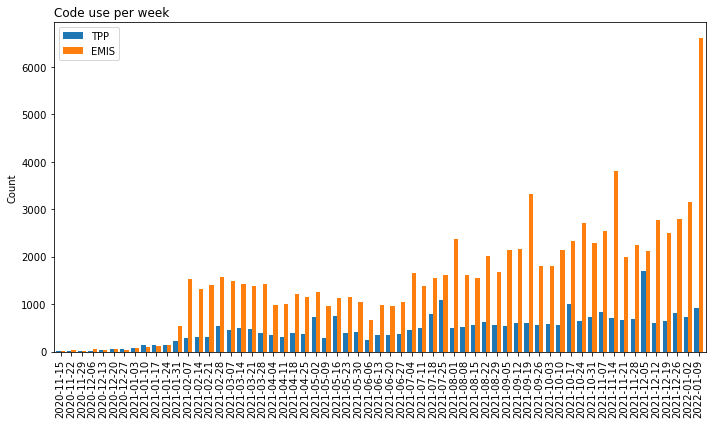

In [5]:
lib.code_use_per_week_graph()

### Use of long COVID codes over time
Stratified by the electronic health record provider of the practice (TPP/SystmOne or EMIS). Reporting lag may affect recent dates.

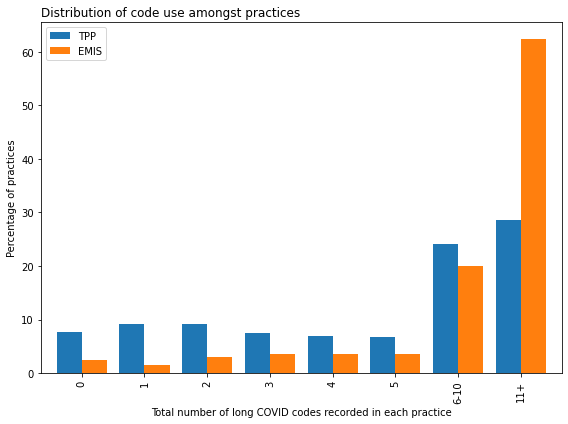

In [6]:
lib.practice_distribution_graph()

### Total use of each individual long COVID related code
This is distinct from the above table in that it counts all coded events, including where patients have been coded more than once.

In [7]:
total, codes_tpp = lib.smoosh_codes_tables()
total = total[(slice(None), "Total records")]
pd.set_option('display.max_colwidth', 200)
display(Markdown(f"There were {float_formatter(total['Total'])} long COVID codes used in total. Counts for each software system were:"))
print(total)
codes_tpp

There were 213,234 long COVID codes used in total. Counts for each software system were:

TPP      45,483.0
EMIS    167,940.0
Total   213,234.0
dtype: float64


\
                                                                                                   term   
code                                                                                                      
1325161000000102                                                                 Post-COVID-19 syndrome   
1325181000000106  Ongoing symptomatic disease caused by severe acute respiratory syndrome coronavirus 2   
1325021000000106                                                     Signposting to Your COVID Recovery   
1325031000000108                                               Referral to post-COVID assessment clinic   
1325041000000104                                Referral to Your COVID Recovery rehabilitation platform   
1325051000000101                        Newcastle post-COVID syndrome Follow-up Screening Questionnaire   
1325061000000103       Assessment using Newcastle post-COVID syndrome Follow-up Screening Questionnaire   
1325071000000105                                       COVID-19 Yorkshire Rehabilitation Screening tool   
1325081000000107                      Assessment using COVID-19 Yorkshire Rehabilitation Screening tool   
1325091000000109                              Post-COVID-19 Functional Status Scale patient self-report   
1325101000000101             Assessment using Post-COVID-19 Functional Status Scale patient self-report   
1325121000000105            Post-COVID-19 Functional Status Scale patient self-report final scale grade   
1325131000000107           Post-COVID-19 Functional Status Scale structured interview final scale grade   
1325141000000103            Assessment using Post-COVID-19 Functional Status Scale structured interview   
1325151000000100                             Post-COVID-19 Functional Status Scale structured interview   

                           TPP               EMIS              Total       
                 Total records    % Total records    % Total records    %  
code                                                                       
1325161000000102       7,166.0 15.8      96,817.0 57.6     103,983.0 48.8  
1325181000000106       6,429.0 14.1      20,019.0 11.9      26,448.0 12.4  
1325021000000106      11,907.0 26.2      28,565.0 17.0      40,472.0 19.0  
1325031000000108      12,610.0 27.7      16,384.0  9.8      28,994.0 13.6  
1325041000000104       5,835.0 12.8       2,299.0  1.4       8,134.0  3.8  
1325051000000101          86.0  0.2       1,378.0  0.8       1,464.0  0.7  
1325061000000103          64.0  0.1         744.0  0.4         808.0  0.4  
1325071000000105         499.0  1.1         412.0  0.2         911.0  0.4  
1325081000000107         835.0  1.8         245.0  0.1       1,080.0  0.5  
1325091000000109           9.0  0.0          48.0  0.0          57.0  0.0  
1325101000000101           NaN  NaN         169.0  0.1           NaN  NaN  
1325121000000105           NaN  NaN          20.0  0.0           NaN  NaN  
1325131000000107           0.0  0.0          10.0  0.0          10.0  0.0  
1325141000000103          33.0  0.1         799.0  0.5         832.0  0.4  
1325151000000100          10.0  0.0          31.0  0.0          41.0  0.0

### Characteristics of the cohort
This is equivalent to Table 1 in [the paper](https://doi.org/10.3399/BJGP.2021.0301)

In [8]:
total, table_1 = lib.get_table_1([tpp, emis, totals])
display(Markdown(f"There were {float_formatter(total[('Totals','Patient count')])} people in the cohort in total. In practices that use TPP software, there were {float_formatter(total[('TPP','Patient count')])}, while in practices that use EMIS software, there were {float_formatter(total[('EMIS','Patient count')])} people."))
display(table_1)

There were 56,893,655 people in the cohort in total. In practices that use TPP software, there were 24,260,294, while in practices that use EMIS software, there were 32,633,361 people.

TPP               EMIS       \
                                   Patient count    % Patient count    %   
age_group 0-17                           4870721 20.1       6629538 20.3   
          18-24                          1917499  7.9       2666547  8.2   
          25-34                          3366454 13.9       4655997 14.3   
          35-44                          3249428 13.4       4557501 14.0   
          45-54                          3266221 13.5       4414387 13.5   
          55-69                          4253261 17.5       5543381 17.0   
          70-79                          2108000  8.7       2629631  8.1   
          80+                            1228710  5.1       1536379  4.7   
sex       F                             12130670 50.0      16278708 49.9   
          M                             12129624 50.0      16354653 50.1   
region    East of England                5679709 23.4       1272787  3.9   
          East Midlands                  4199592 17.3        737305  2.3   
          London                         1701925  7.0       7443846 22.8   
          North East                     1157948  4.8       1143781  3.5   
          North West                     2086800  8.6       6651578 20.4   
          South East                     1623419  6.7       6898964 21.1   
          South West                     3316423 13.7       2391647  7.3   
          West Midlands                  1001018  4.1       4890958 15.0   
          Yorkshire and The Humber       3484279 14.4       1145965  3.5   
imd       Missing                         591472  2.4        111395  0.3   
          Most deprived 1                4862922 20.0       6714374 20.6   
          2                              4757162 19.6       6912665 21.2   
          3                              5011128 20.7       6328659 19.4   
          4                              4707384 19.4       6147976 18.8   
          Least deprived 5               4330226 17.8       6418292 19.7   
ethnicity Missing                        6678916 27.5      10815339 33.1   
          White                         14764094 60.9      17011036 52.1   
          Mixed                           321077  1.3        552309  1.7   
          South Asian                    1502319  6.2       2417634  7.4   
          Black                           516863  2.1       1119512  3.4   
          Other                           477025  2.0        717531  2.2   

                                          Totals       
                                   Patient count    %  
age_group 0-17                          11500259 20.2  
          18-24                          4584046  8.1  
          25-34                          8022451 14.1  
          35-44                          7806929 13.7  
          45-54                          7680608 13.5  
          55-69                          9796642 17.2  
          70-79                          4737631  8.3  
          80+                            2765089  4.9  
sex       F                             28409378 49.9  
          M                             28484277 50.1  
region    East of England                6952496 12.2  
          East Midlands                  4936897  8.7  
          London                         9145771 16.1  
          North East                     2301729  4.1  
          North West                     8738378 15.4  
          South East                     8522383 15.0  
          South West                     5708070 10.0  
          West Midlands                  5891976 10.4  
          Yorkshire and The Humber       4630244  8.1  
imd       Missing                         702867  1.2  
          Most deprived 1               11577296 20.3  
          2                             11669827 20.5  
          3                             11339787 19.9  
          4                             10855360 19.1  
          Least deprived 5              10748518 18.9  
ethnicity Missing       